### Generating a metaloci region file

In [17]:
%%bash
metaloci sniffer -w example_working_directory -s data/mm39_chrom_sizes.txt -g data/gencode.vM35.annotation_chr19.gtf.gz -r 10000 -e 2000000
6

Parsing the gene annotation file...
Index: 0; All genes
Index: 1; lncRNA
Index: 2; IG_V_pseudogene
Index: 3; snRNA
Index: 4; processed_pseudogene
Index: 5; transcribed_processed_pseudogene
Index: 6; protein_coding
Index: 7; miRNA
Index: 8; snoRNA
Index: 9; TEC
Index: 10; unprocessed_pseudogene
Index: 11; misc_RNA
Index: 12; sRNA
Index: 13; rRNA
Index: 14; transcribed_unprocessed_pseudogene
Index: 15; scaRNA
Index: 16; transcribed_unitary_pseudogene
Index: 17; ribozyme
Choose the gene type to parse in the final file: Gene type chosen: protein_coding
Gathering information from the annotation file...
Aggregating genes that are located in the same bin...
Parsing the gene annotation file... Done.
Gathering information about bin index where the gene is located...
A total of 637 entries will be written to example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt


100%|██████████| 637/637 [00:00<00:00, 1495.77it/s]


Cleaning temporary files...

Total time spent: 0:00:07.
All done.


*Making a random subset of 24 regions of the generated metaloci region file:*

In [18]:
%%bash
head example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt
{ head -n 1 example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt; tail -n +2 example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt | shuf -n 24; } > example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_subset_coords.txt
rm example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt

coords	symbol	id
chr19:1330000-5340000_200	Ighmbp2,Mrpl21	ENSMUSG00000024831,ENSMUSG00000024829
chr19:1370000-5380000_200	Cpt1a	ENSMUSG00000024900
chr19:1430000-5440000_200	Tesmin	ENSMUSG00000024905
chr19:1460000-5470000_200	Gal	ENSMUSG00000024907
chr19:1620000-5630000_200	Ppp6r3	ENSMUSG00000024908
chr19:1730000-5740000_200	Lrp5	ENSMUSG00000024913
chr19:1750000-5760000_200	1810055G02Rik	ENSMUSG00000035372
chr19:1810000-5820000_200	Kmt5b	ENSMUSG00000045098
chr19:1900000-5910000_200	Chka	ENSMUSG00000024843


### Binning the signal files

In [19]:
%%bash
metaloci prep -w example_working_directory -c data/hic/ICE_DM_5kb_eef0283c05_chr19.mcool -d data/signal/mm39_organoid_ATAC_4000_chr19.bed -r 10000 -s data/mm39_chrom_sizes.txt
echo && ls example_working_directory

Checking input files compatibility... OK.

Processing signal file: data/signal/mm39_organoid_ATAC_4000_chr19.bed [1/1]

	Sorting signal... done.
	Intersecting signal with 10000bp bins...


        all done! (: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


	Assigning signal to bins... done.

Concatenating signals in one file... done.

Signal bed files saved to example_working_directory/signal/

Total time spent: 0:00:01.

All done.

bad_regions.txt
chr19
example_working_directory_protein_coding_2000000_10000_gene_subset_coords.txt
moran_info.txt
signal


### Parameter optimisation

**Do not run the following command, it might take hours to run. The output of this optimisation will be:**

Cut-off (-o): **0.2**; Persistence length (-l): **7.044** 

In [20]:
%%bash
#metaloci bts -w example_working_directory -c data/hic/ICE_DM_5kb_eef0283c05_chr19.mcool -r 10000 -g example_working_directory/example_working_directory_protein_coding_2000000_10000_gene_coords.txt


### Layouting the Hi-C matrix

*The time showed in the prints migth be off because we are using an ipy notebook.*

In [21]:
%%bash
metaloci layout -w example_working_directory -c data/hic/ICE_DM_5kb_eef0283c05_chr19.mcool -r 10000 -o 0.2 -l 7.044
ls example_working_directory/chr19/objects




------> 24 regions will be computed.
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                             

### Computing the spatial autocorrelation of the signal


In [22]:
%%bash
metaloci lm -w example_working_directory -s mm39_organoid_ATAC_4000_chr19 -b



------> 24 regions will be computed.
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                             

### Plotting the results

In [23]:
%%bash
metaloci figure -w example_working_directory -s mm39_organoid_ATAC_4000_chr19 
ls example_working_directory/chr19/plots



------> 24 regions will be computed.
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                                
                                                                                                                                                             

### Examining the results of a random region

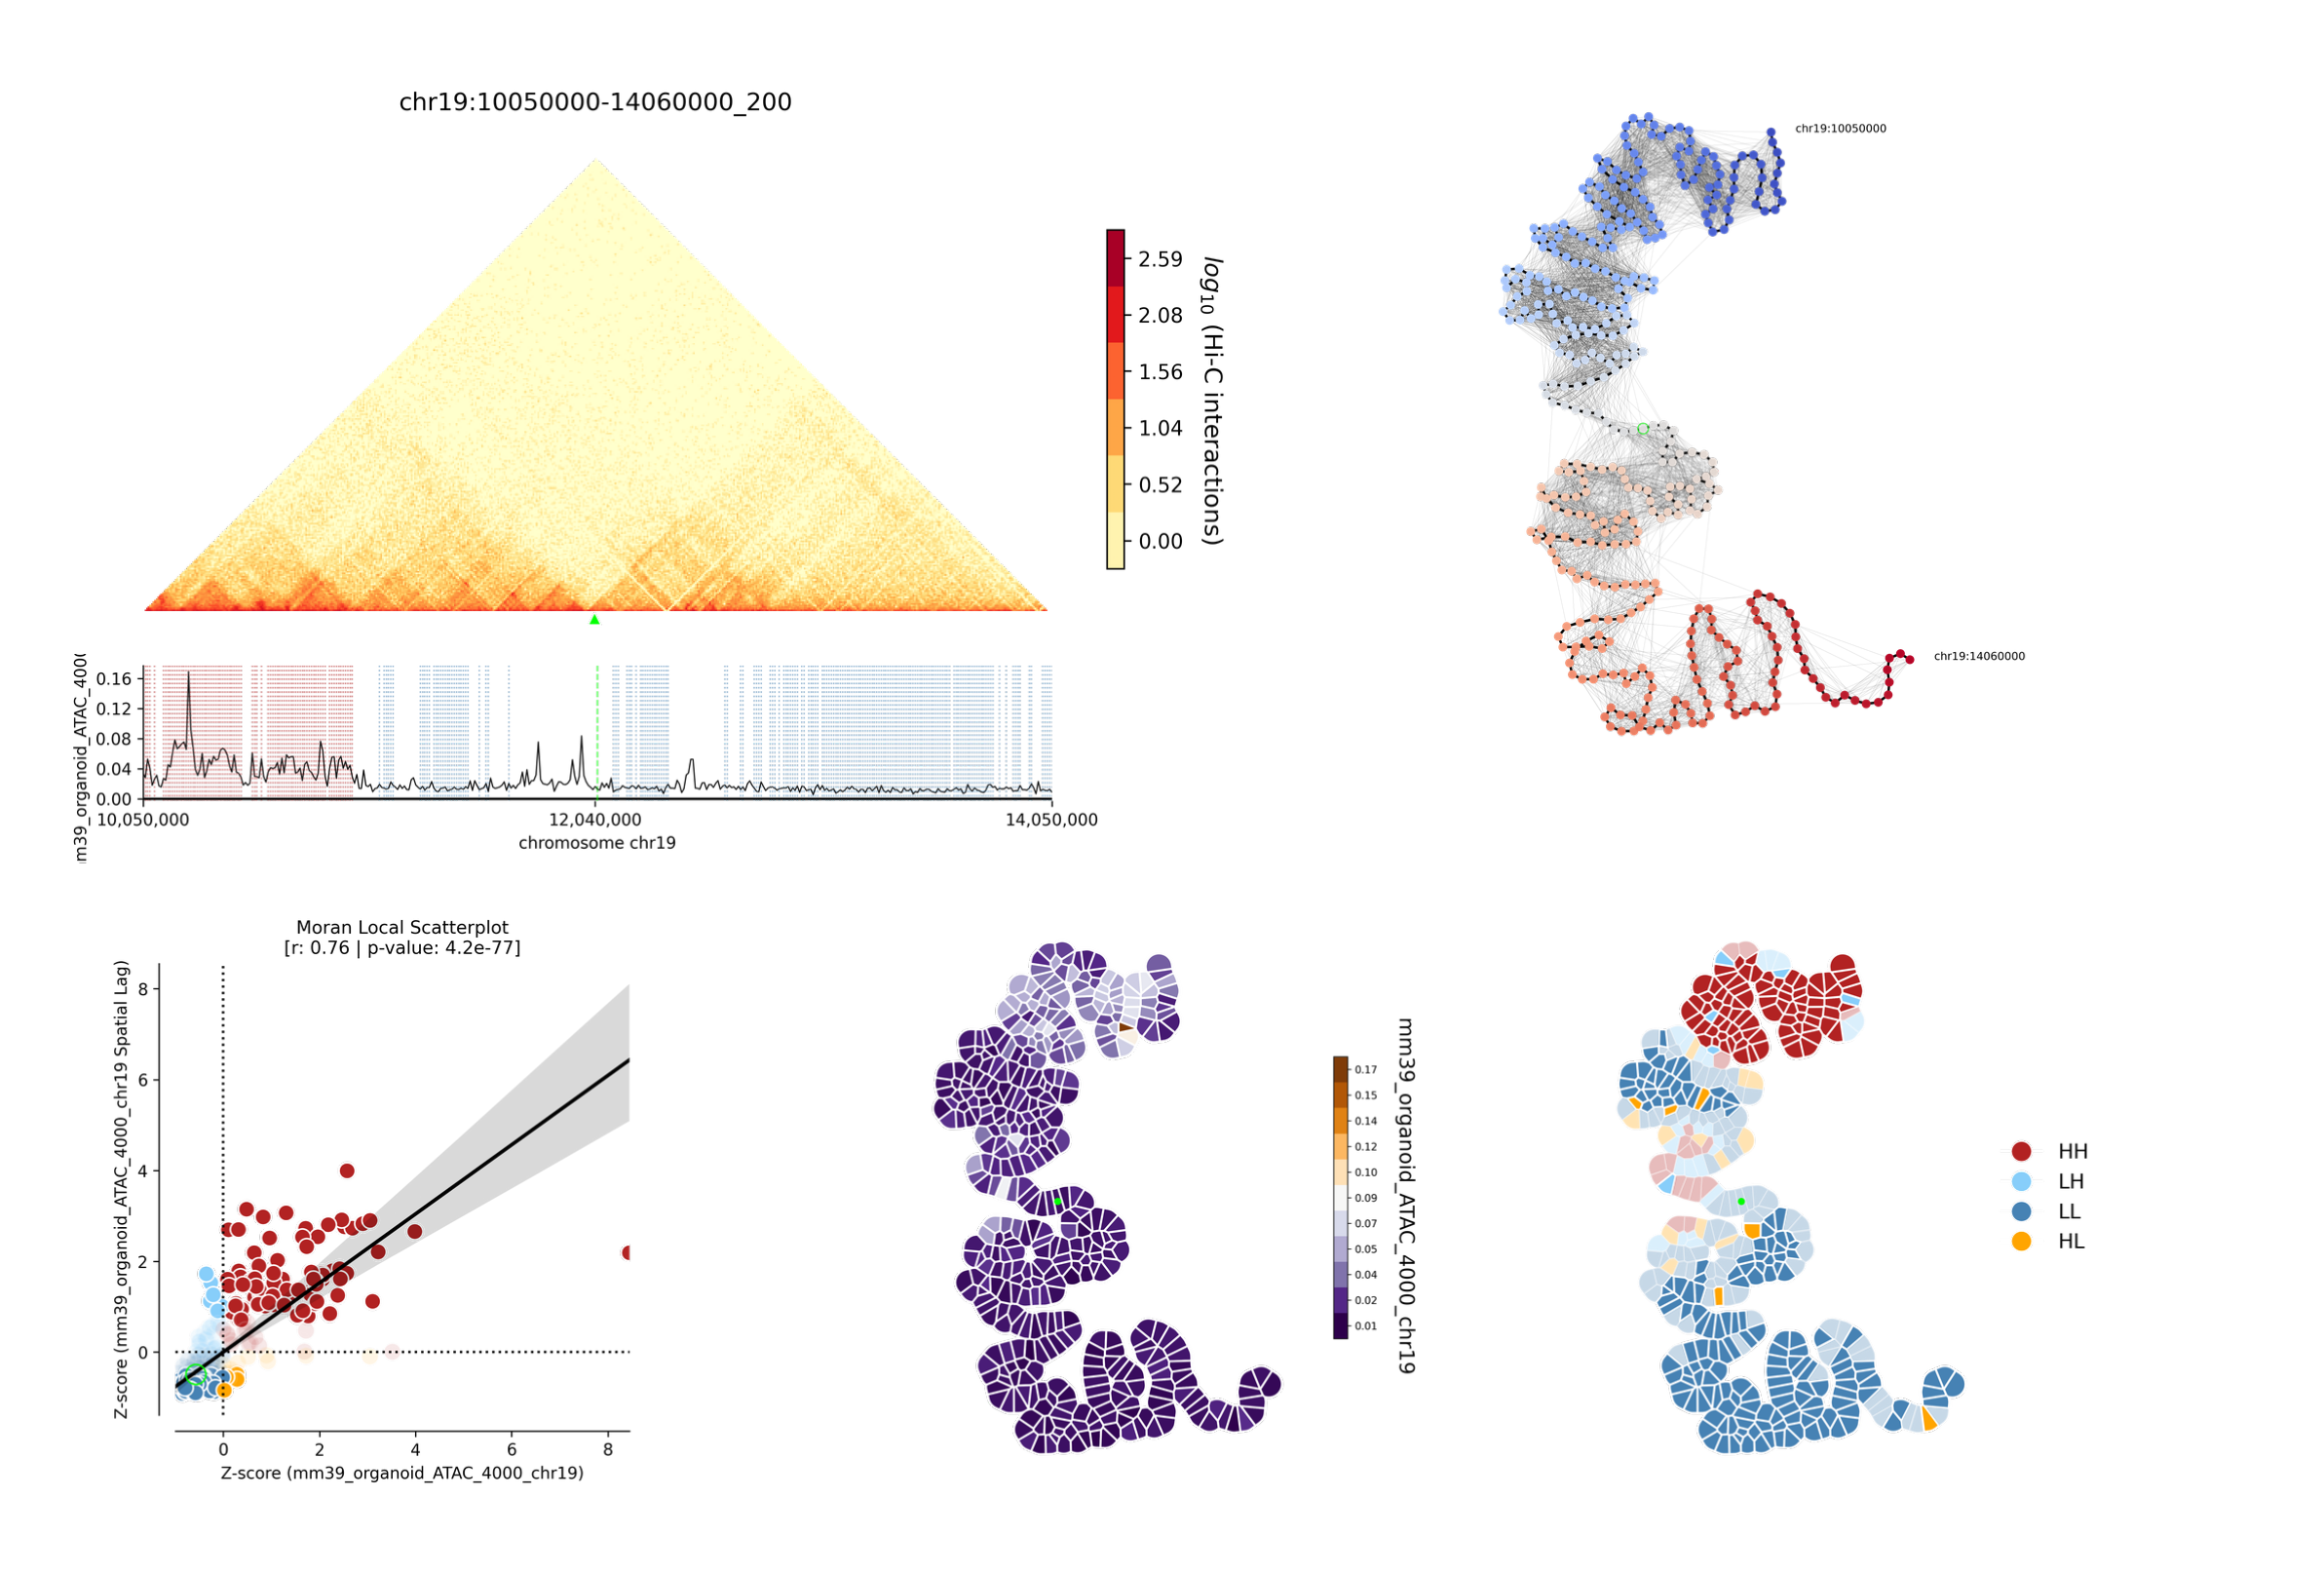

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread('example_working_directory/chr19/plots/mm39_organoid_ATAC_4000_chr19/chr19_10050000_14060000_200/chr19_10050000_14060000_200_10000_mm39_organoid_ATAC_4000_chr19.png')

plt.figure(figsize=(10, 8), dpi=300)  
imgplot = plt.imshow(img)
plt.axis('off')  
plt.show()